# A4 Sounds and Spectra

# 1 Harmonics

### Description
Harmonics are combinations of frequenies that is an integer multiple of a fundamental frequency.

$$
f_n = n f_n
$$

and they increment like the first harmonic to second harmonic in a linear pattern.

$$
f_2 = 2f_1
$$

Harmonics arise from modes of vibration of a physical objects or resonant acvities. 

`Pure Tone`~ A sound composed of a single frequency.

### Equation
$$
x(t) = \sum_{k=1}^N a_k * cos(2 \pi k f_1 t + \phi _k) 
$$

- t being the time vector
- a being the amplitude
- f1 being the fundamental harmonic
- phi being the phase
- k being the kth harmonic


In [22]:
from A4_rhl72 import *
import numpy as np
import matplotlib.pyplot as plt

## 1a harmonics()  

In [23]:
def harmonic(t, f1=1, alist=1, philist=0):
    """
    generate a harmonic wave
    
    t ~ Time of a Harmonic Function 
    f1 ~ Fundamental Frequncy (hz)
    alist ~ Values specify the amplitudes of each harmonic starting with the fundament
    philist ~ Phase shifts (radians)
    use cosine
    """

    alist = np.atleast_1d(alist)
    phaselist = np.atleast_1d(philist)

    # Match lengths
    if phaselist.size == 1:
        phaselist = np.full_like(alist, phaselist)

    # Sum the cosine components
    waveform = sum(
        a * np.cos(2 * np.pi * (i + 1) * f1 * t + phi)
        for i, (a, phi) in enumerate(zip(alist, phaselist))
    )
    
    return waveform

1a demo

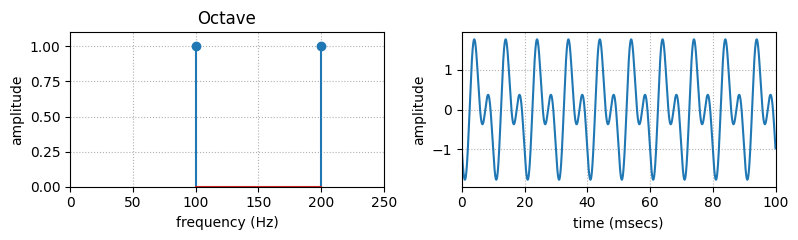

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 44100          # Sampling rate
duration = 0.1      # 100 milliseconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Frequencies and amplitudes
f1 = 100
f2 = 200
alist = [1.0, 1.0]
frequencies = [f1, f2]

philist = [0, -np.pi / 2]  # phase shift second harmonic to sine wave
wave = alist[0] * np.cos(2 * np.pi * f1 * t + philist[0]) + alist[1] * np.cos(2 * np.pi * f2 * t + philist[1])

wave = -wave

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))

# Frequency domain (stem plot)
axs[0].stem(frequencies, alist)
axs[0].set_title("Octave")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("amplitude")
axs[0].set_xlim(0, 250)
axs[0].set_ylim(0, 1.1)
axs[0].grid(True, linestyle=":")

# Time domain waveform
axs[1].plot(t * 1000, wave)
axs[1].set_xlabel("time (msecs)")
axs[1].set_ylabel("amplitude")
axs[1].set_xlim(0, 100)
axs[1].grid(True, linestyle=":")

plt.tight_layout()
plt.show()



cosines()

In [25]:
def cosines(t, flist=1, alist=1, philist=0):
    """
    Generate a sum of cosine waves with arbitrary frequencies.
    
    Parameters:
    - t: time array
    - flist: list of frequencies (Hz)
    - alist: list of amplitudes
    - philist: list of phase shifts (radians)
    """
    flist = np.atleast_1d(flist)
    alist = np.atleast_1d(alist)
    philist = np.atleast_1d(philist)

    # Match lengths
    if alist.size == 1:
        alist = np.full_like(flist, alist)
    if philist.size == 1:
        philist = np.full_like(flist, philist)

    waveform = sum(
        a * np.cos(2 * np.pi * f * t + phi)
        for f, a, phi in zip(flist, alist, philist)
    )
    
    return waveform

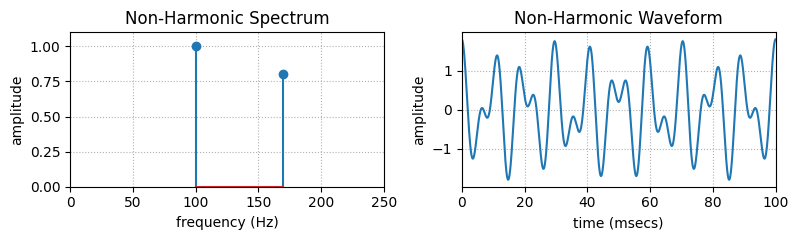

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector: 100 ms at 44.1 kHz
fs = 44100
duration = 0.1  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Non-harmonic frequencies
flist = [100, 170]
alist = [1.0, 0.8]
philist = [0, 0]


# Generate waveform
wave = cosines(t, flist, alist, philist)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))

# Frequency stem plot
axs[0].stem(flist, alist)
axs[0].set_title("Non-Harmonic Spectrum")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("amplitude")
axs[0].set_xlim(0, 250)
axs[0].set_ylim(0, 1.1)
axs[0].grid(True, linestyle=":")

# Time-domain waveform (first 100 ms)
axs[1].plot(t * 1000, wave)
axs[1].set_title("Non-Harmonic Waveform")
axs[1].set_xlabel("time (msecs)")
axs[1].set_ylabel("amplitude")
axs[1].set_xlim(0, 100)
axs[1].grid(True, linestyle=":")

plt.tight_layout()
plt.show()


## 1b Pitch and Tone

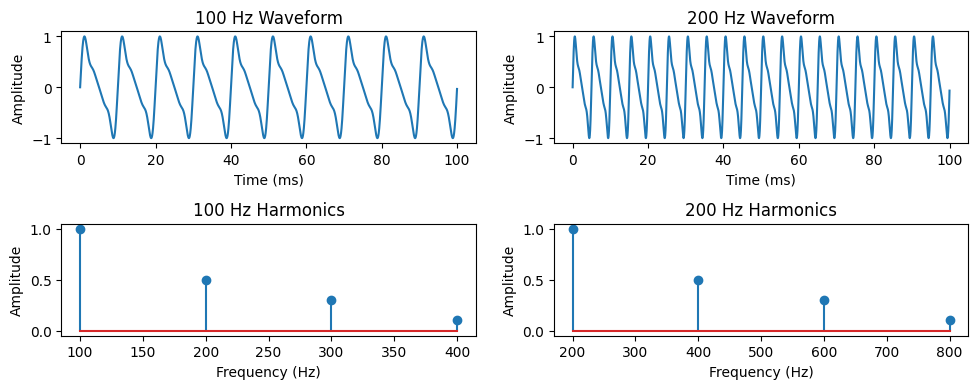

In [27]:

from scipy.io.wavfile import write
import matplotlib.pyplot as plt

fs = 44100  # 44.1 kHz standard audio
duration = 1.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Common harmonic structure (e.g., 4 harmonics)
alist = [1.0, 0.5, 0.3, 0.1]
philist = -np.pi/2  # Use this so wave starts at 0 (avoids pops)

wave1 = harmonic(t, f1=100, alist=alist, philist=philist)
wave2 = harmonic(t, f1=200, alist=alist, philist=philist)


# Normalize to avoid clipping
wave1 = wave1 / np.max(np.abs(wave1))
wave2 = wave2 / np.max(np.abs(wave2))

write("wave_100Hz.wav", fs, (wave1 * 32767).astype(np.int16))
write("wave_200Hz.wav", fs, (wave2 * 32767).astype(np.int16))


# Small segment to visualize clearly
segment = slice(0, int(0.1 * fs))  # First 100ms

fig, axs = plt.subplots(2, 2, figsize=(10, 4))

# Time plots
axs[0, 0].plot(t[segment]*1000, wave1[segment])
axs[0, 0].set_title("100 Hz Waveform")
axs[0, 0].set_xlabel("Time (ms)")
axs[0, 0].set_ylabel("Amplitude")

axs[0, 1].plot(t[segment]*1000, wave2[segment])
axs[0, 1].set_title("200 Hz Waveform")
axs[0, 1].set_xlabel("Time (ms)")
axs[0, 1].set_ylabel("Amplitude")

# Frequency stems
f1s = [(i + 1) * 100 for i in range(len(alist))]
f2s = [(i + 1) * 200 for i in range(len(alist))]

axs[1, 0].stem(f1s, alist)
axs[1, 0].set_title("100 Hz Harmonics")
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Amplitude")

axs[1, 1].stem(f2s, alist)
axs[1, 1].set_title("200 Hz Harmonics")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()




The 200 hz sounds higher than 100 hz (predicted), the tone of the 100 hz makes it sound like background noise, while the 200 hz sounds more like like something I should be more alert to.

## 1c Timbre

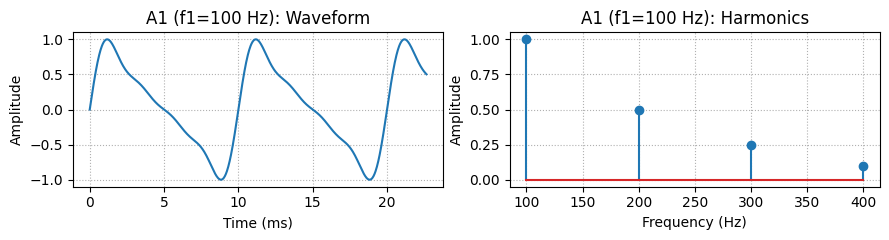

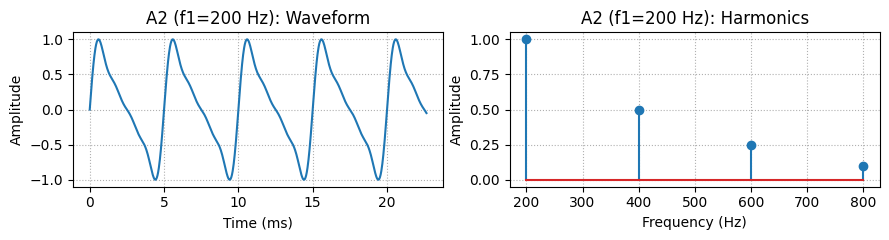

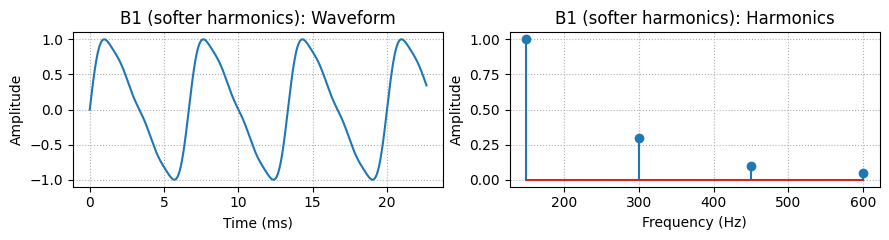

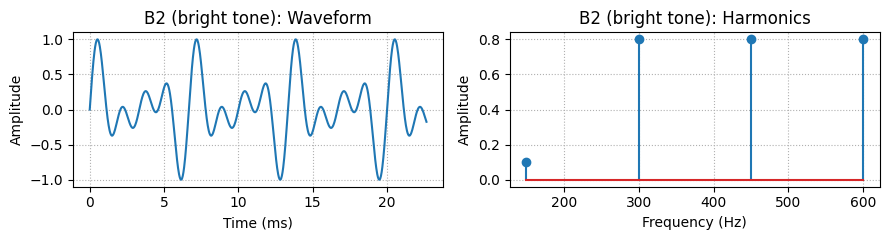

In [28]:
import matplotlib.pyplot as plt

fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Same harmonic pattern
alist_same = [1.0, 0.5, 0.25, 0.1]
philist = -np.pi/2  # start at 0

# Two different fundamentals
wave_A1 = harmonic(t, f1=100, alist=alist_same, philist=philist)
wave_A2 = harmonic(t, f1=200, alist=alist_same, philist=philist)

# Normalize
wave_A1 /= np.max(np.abs(wave_A1))
wave_A2 /= np.max(np.abs(wave_A2))

# Save to wav
from scipy.io.wavfile import write
write("tone_similar_f1_100_a1.wav", fs, (wave_A1 * 32767).astype(np.int16))
write("tone_similar_f1_200_a2.wav", fs, (wave_A2 * 32767).astype(np.int16))

# Same fundamental
f1 = 150

# Different harmonic patterns
alist_diff1 = [1.0, 0.3, 0.1, 0.05]      # softer upper harmonics
alist_diff2 = [0.1, 0.8, 0.8, 0.8]      # strong higher harmonics

wave_B1 = harmonic(t, f1=f1, alist=alist_diff1, philist=philist)
wave_B2 = harmonic(t, f1=f1, alist=alist_diff2, philist=philist)

wave_B1 /= np.max(np.abs(wave_B1))
wave_B2 /= np.max(np.abs(wave_B2))

write("tone_diff_pattern_1_b1.wav", fs, (wave_B1 * 32767).astype(np.int16))
write("tone_diff_pattern_2_b2.wav", fs, (wave_B2 * 32767).astype(np.int16))


def plot_wave_and_spectrum(t, wave, alist, f1, title_prefix):
    fig, axs = plt.subplots(1, 2, figsize=(9, 2.5))

    # Time-domain waveform (first 100 ms)
    axs[0].plot(t[:1000]*1000, wave[:1000])
    axs[0].set_title(f"{title_prefix}: Waveform")
    axs[0].set_xlabel("Time (ms)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True, linestyle=":")

    # Frequency stem plot
    freqs = [(i + 1) * f1 for i in range(len(alist))]
    axs[1].stem(freqs, alist)
    axs[1].set_title(f"{title_prefix}: Harmonics")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude")
    axs[1].grid(True, linestyle=":")

    plt.tight_layout()
    plt.show()

# Plot A: Similar tone, different fundamentals
plot_wave_and_spectrum(t, wave_A1, alist_same, 100, "A1 (f1=100 Hz)")
plot_wave_and_spectrum(t, wave_A2, alist_same, 200, "A2 (f1=200 Hz)")

# Plot B: Different tone, same fundamental
plot_wave_and_spectrum(t, wave_B1, alist_diff1, f1, "B1 (softer harmonics)")
plot_wave_and_spectrum(t, wave_B2, alist_diff2, f1, "B2 (bright tone)")




A1 and A2 I hear the same tone quality, but in different pitches, B1 and B2 I hear very different "textures" B2 is mellower and B2 is harsher.

# 2 Noise 

## 2a. White Noise

White noise consists of random, uncorrelated samples with equal spectral energy across all frequencies. The key difference between types of white noise lies in their **amplitude distributions**.

---

### Uniform White Noise

Uniform white noise is generated by drawing each sample from a **uniform distribution** in the range `(-1, 1)`.  
All amplitudes within this range are **equally likely**, resulting in a flat, evenly distributed texture.

---

### Gaussian White Noise

Gaussian white noise uses samples drawn from a **normal (Gaussian) distribution** centered at 0.  
Most values cluster around 0 with **fewer extreme values**, producing a smooth, natural-sounding noise.  
This is the most common form of white noise used in signal processing.

---

### Sparse White Noise (Laplacian)

Sparse white noise is drawn from a **Laplacian distribution**, which has a sharper peak at 0 and **heavier tails** than a Gaussian.  
This means extreme values occur more frequently, giving the sound a **spiky** or **impulsive** quality.


In [29]:
import numpy as np

fs = 44100
duration = 1.0
n_samples = int(fs * duration)

# Uniform white noise: [-1, 1)
noise_uniform = np.random.uniform(-1, 1, n_samples)

# Gaussian white noise: mean 0, std 1
noise_gaussian = np.random.normal(0, 1, n_samples)

# Sparse noise: Laplacian (heavy-tailed)
noise_sparse = np.random.laplace(0, 1, n_samples)


In [30]:
def normalize_power(x, target_rms=0.1):
    rms = np.sqrt(np.mean(x**2))
    return x * (target_rms / rms)

noise_uniform = normalize_power(noise_uniform)
noise_gaussian = normalize_power(noise_gaussian)
noise_sparse = normalize_power(noise_sparse)


In [31]:
from scipy.io.wavfile import write

write("white_uniform.wav", fs, (noise_uniform * 32767).astype(np.int16))
write("white_gaussian.wav", fs, (noise_gaussian * 32767).astype(np.int16))
write("white_sparse.wav", fs, (noise_sparse * 32767).astype(np.int16))


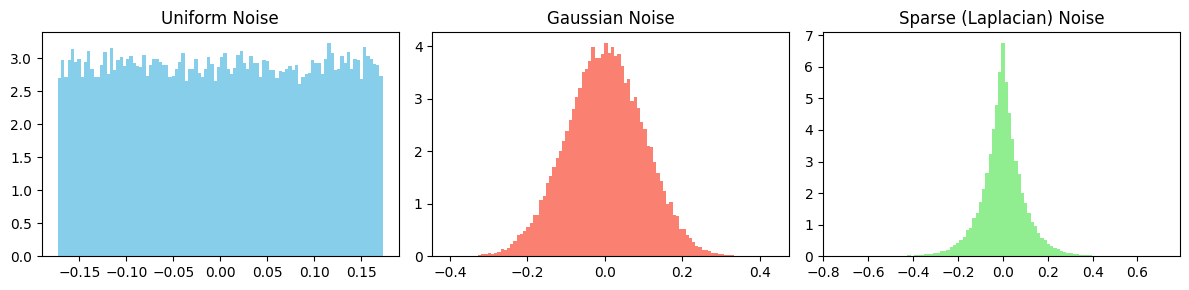

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.hist(noise_uniform, bins=100, density=True, color='skyblue')
plt.title("Uniform Noise")

plt.subplot(1, 3, 2)
plt.hist(noise_gaussian, bins=100, density=True, color='salmon')
plt.title("Gaussian Noise")

plt.subplot(1, 3, 3)
plt.hist(noise_sparse, bins=100, density=True, color='lightgreen')
plt.title("Sparse (Laplacian) Noise")

plt.tight_layout()
plt.show()


I would have assumed that I could based on my knowledge. Even though they have flat spectral energy, their amplitude distributions differ. However, when I listened , they sound the exact same (to me at least).

## 2b Bandpass Noise

In [33]:
from scipy.signal import fftconvolve

def bandpass_noise(t, fs, f_center, sigma, noise_type="gaussian"):
    """
    Create bandpass noise by filtering white noise with a Gabor filter.
    
    Parameters:
    - t: time vector
    - fs: sampling rate
    - f_center: center frequency of the band
    - sigma: width of the Gabor (controls bandwidth)
    - noise_type: "gaussian", "uniform", etc.
    
    Returns:
    - Bandpassed noise signal
    """
    # Generate white noise
    if noise_type == "gaussian":
        noise = np.random.normal(0, 1, len(t))
    elif noise_type == "uniform":
        noise = np.random.uniform(-1, 1, len(t))
    else:
        raise ValueError("Unsupported noise type.")
    
    # Create Gabor filter
    g = gabor(t - t.mean(), sigma, f_center)
    g /= np.linalg.norm(g)  # Normalize to prevent gain boost
    
    # Apply filter (convolution in time)
    filtered = fftconvolve(noise, g, mode="same")
    
    return filtered


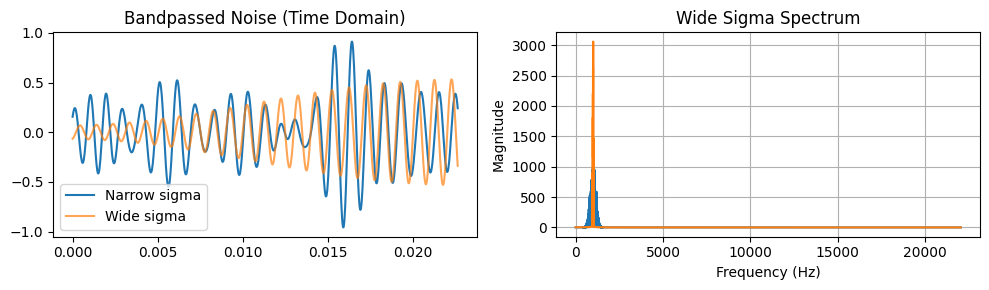

In [34]:
fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Try two sigma values
f_center = 1000
sigma_narrow = 0.001
sigma_wide = 0.01

noise_narrow = bandpass_noise(t, fs, f_center, sigma_narrow)
noise_wide = bandpass_noise(t, fs, f_center, sigma_wide)

# Normalize
noise_narrow /= np.max(np.abs(noise_narrow))
noise_wide /= np.max(np.abs(noise_wide))

import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def plot_spectrum(signal, fs, title=""):
    N = len(signal)
    freqs = fftfreq(N, 1/fs)
    mag = np.abs(fft(signal))[:N//2]
    plt.plot(freqs[:N//2], mag)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

# Time domain
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(t[:1000], noise_narrow[:1000], label="Narrow sigma")
plt.plot(t[:1000], noise_wide[:1000], label="Wide sigma", alpha=0.7)
plt.title("Bandpassed Noise (Time Domain)")
plt.legend()

# Frequency domain
plt.subplot(1, 2, 2)
plot_spectrum(noise_narrow, fs, "Narrow Sigma Spectrum")
plot_spectrum(noise_wide, fs, "Wide Sigma Spectrum")
plt.tight_layout()
plt.show()



# 3 Correlation


 ## Auto Correlation
 ---
 Measures how similar a signal is to a time-shifted version of itself.

$$
R_{xx}[n] = \sum_{k} x[k]*x[k-n]
$$

- n is the lag
- peaks in the result show periodicity 
    - great for pitch detection
- Always symmetric around n= 0

## Cross Correlation
---
Measures how similar two signals are at different alignments.
$$
R_{xy}[n] = \sum_k y[k]*x[k-n]
$$

- x is the reference, and y is sliding over it.
- Used for pattern matching or delay estimation.

## Convolution 
---
(For contrast)
$$
(x*h)[n] = \sum_k x[k]*h[n-k]
$$

- Very similar form, but we flip the n and k
- Represents how a system (impulse response h) filters a signal.
- Not symetric like auto correlation

## Normalization
Correlation can be scaled by signal energy to remove dependence on amplitude.
$$
\rho_{xx}[n] = \frac{R_{xx}[n]}{R_{xx}[0]}
$$

$$
\rho_{xx}[n] = \frac{R_{xx}[n]}{||x|| * ||y||}
$$
- Ensures output is between -1 and 1
- Allows for comparing signals with different energies.

## Sum-Squared Error (SSE)
---
Measures the difference between two signals point by point
$$
SSE[n] = \sum_k (x[k-n] - y[k])^2
$$

## 3a Auto Correlation vs Self Convolution

Auto correlation has no flipping, measures similarity with shifted version of itself, and is always symmetric around n = 0. Self Convolution has one version of x flipped, models linear system response, not necessarily symmetric.

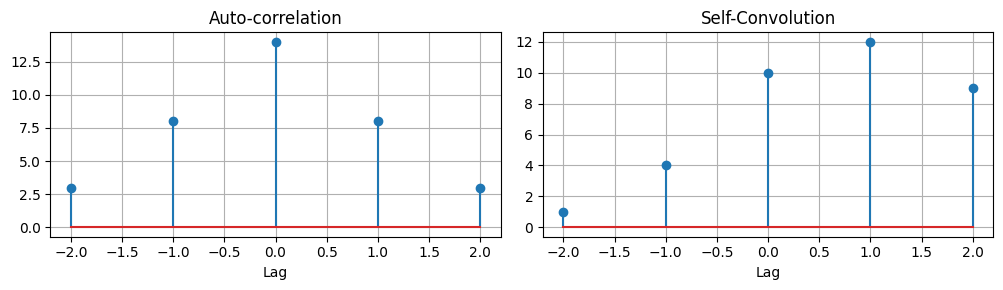

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve

# Asymmetric signal
x = np.array([1, 2, 3])
lags = np.arange(-len(x)+1, len(x))

# Compute auto-correlation and self-convolution
auto = correlate(x, x, mode='full')
conv = convolve(x, x, mode='full')

# Plot
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.stem(lags, auto)
plt.title("Auto-correlation")
plt.xlabel("Lag")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(lags, conv)
plt.title("Self-Convolution")
plt.xlabel("Lag")
plt.grid(True)

plt.tight_layout()
plt.show()



Auto correlation compares x[k] with x[k-n] shifting, not flipping so $R_{xx}[n] = R_{xx}[-n]$, but convolution compares x[k] with x[n-k] which does involve flipping, and this flipping breaks the symmetry unless x itself is symmetric and centered.


## 3b Cross correlation vs Convolution

In Convolution one signal is flipped and then shifted. Cross Correlation, there is no fliping just shifting.

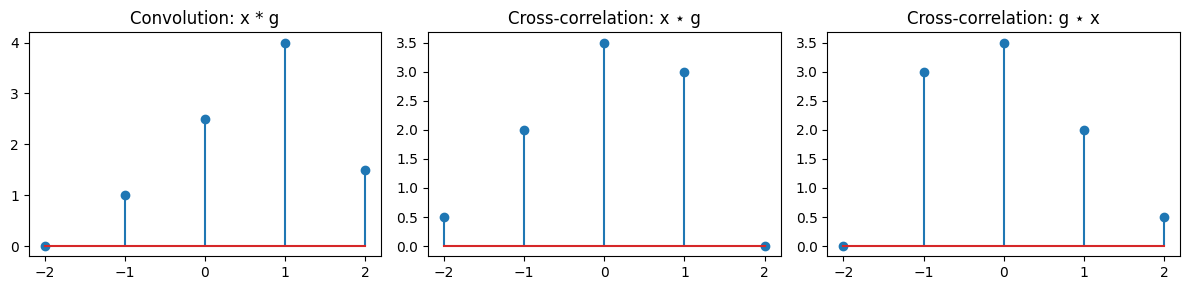

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve

x = np.array([1, 2, 3])
g = np.array([0, 1, 0.5])
lags = np.arange(-len(x)+1, len(x))

# Cross-correlation (x ⋆ g) and (g ⋆ x)
corr_xg = correlate(x, g, mode='full')
corr_gx = correlate(g, x, mode='full')

# Convolution (x * g)
conv_xg = convolve(x, g, mode='full')

# Plot
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.stem(np.arange(len(conv_xg)) - (len(x)-1), conv_xg)
plt.title("Convolution: x * g")

plt.subplot(1, 3, 2)
plt.stem(np.arange(len(corr_xg)) - (len(x)-1), corr_xg)
plt.title("Cross-correlation: x ⋆ g")

plt.subplot(1, 3, 3)
plt.stem(np.arange(len(corr_gx)) - (len(g)-1), corr_gx)
plt.title("Cross-correlation: g ⋆ x")

plt.tight_layout()
plt.show()


Convolution flips g, so its fundamentally different. Cross correlation $x*g$ slides g over x and cross correlation $g*x$ slides x over g, the result is not the same.

So Convolution is not the same as cross correlation, crosscorrelation is not communitive, but convolution is commutative due to the flip.

In systems theory, convolution models how a system (with impulse response h) response to input x. Flipping h aligns its start time (0) with each point in x, that is how we build the response.

If the template (kernel) was symmetric,then flipping it didn't change it. 

So, when is convolution and cross correlation equivalent? 

$$
g[n]=g[-n]
$$

## 3c Cross Correlation vs Sum Squared Error
Cross correlation measures how similar two signals are when one is shifted over the other, while Sume Sqared Error measures how different two signals are at each shift total squared difference between aligned samples.

The relationship between the two is one is the metric for its accuracy and inaccuracy for one signal representing another.

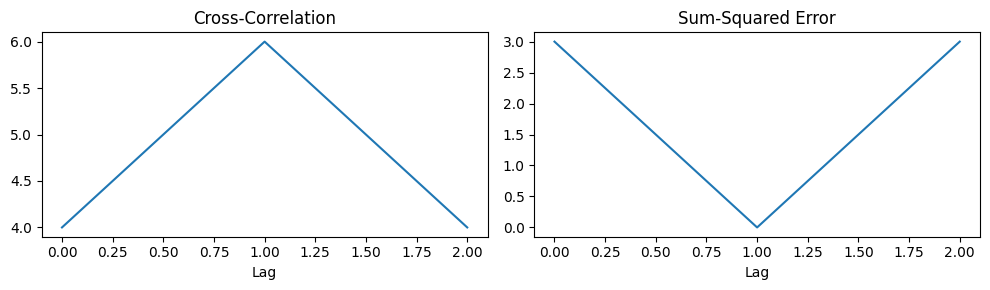

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Signals
x = np.array([0, 1, 2, 1, 0])
y = np.array([1, 2, 1])

# Cross-correlation
corr = correlate(x, y, mode='valid')

# SSE
def sse_shift(x, y):
    sse = []
    for i in range(len(x) - len(y) + 1):
        sse.append(np.sum((x[i:i+len(y)] - y)**2))
    return np.array(sse)

sse = sse_shift(x, y)

# Plot
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(corr)
plt.title("Cross-Correlation")
plt.xlabel("Lag")

plt.subplot(1, 2, 2)
plt.plot(sse)
plt.title("Sum-Squared Error")
plt.xlabel("Lag")

plt.tight_layout()
plt.show()


SSE and cross correlation are linearly and negatively related. 

Practically it is best to use cross correlation when you are looking for pattern detection / matching, and SSE is best for looking for exact matches or getting the exact result of something.

# 4 Implementation and Application


## 4a

In [38]:
def convolve(x, y):
    """
    Convolve x and y using the definition (not using np.convolve).
    Zero-pad signals to handle boundaries.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    N = len(x)
    M = len(y)
    result = np.zeros(N + M - 1)

    for n in range(N + M - 1):
        total = 0
        for k in range(N):
            j = n - k
            if 0 <= j < M:
                total += x[k] * y[j]
        result[n] = total
    return result


def autocorr(x, normalize=True):
    """
    Compute the auto-correlation of signal x.
    If normalize=True, divide by value at zero lag.
    """
    x = np.asarray(x)
    result = np.correlate(x, x, mode='full')
    
    if normalize:
        result = result / result[len(x) - 1]  # Normalize by peak at zero lag
    return result

def crosscorr(x, y, normalize=True):
    """
    Compute the cross-correlation between x and y.
    If normalize=True, divide by product of norms.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    result = np.correlate(x, y, mode='full')
    
    if normalize:
        norm = np.linalg.norm(x) * np.linalg.norm(y)
        if norm != 0:
            result = result / norm
    return result


## 4b

Estimated pitch: 220.50 Hz


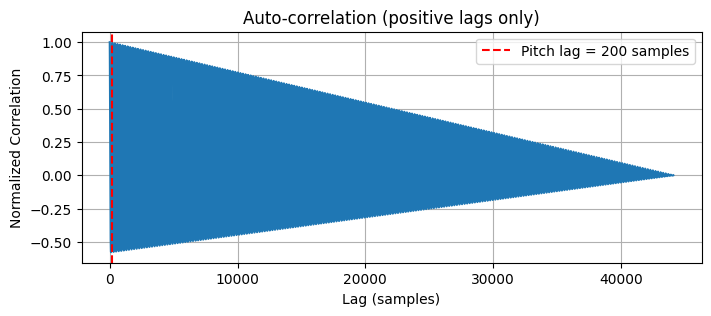

In [39]:
from scipy.signal import find_peaks
import numpy as np

# Generate a harmonic signal 
fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

f1_true = 220  # Hz (A3 note)
alist = [1.0, 0.5, 0.3, 0.2]
philist = -np.pi/2

x = harmonic(t, f1=f1_true, alist=alist, philist=philist)

# Compute Auto Correlation
ac = autocorr(x, normalize=True)
lags = np.arange(-len(x) + 1, len(x))  # symmetrical lags


mid = len(ac) // 2
acf_pos = ac[mid:]  # keep only non-negative lags

# Skip the zero-lag and find next peak
peaks, _ = find_peaks(acf_pos[1:])  # [1:] skips lag=0
first_peak_lag = peaks[0] + 1       # adjust index due to slicing

# Convert lag to seconds → get pitch
period = first_peak_lag / fs
estimated_pitch = 1 / period
print(f"Estimated pitch: {estimated_pitch:.2f} Hz")

plt.figure(figsize=(8, 3))
plt.plot(acf_pos)
plt.axvline(first_peak_lag, color='r', linestyle='--', label=f'Pitch lag = {first_peak_lag} samples')
plt.title("Auto-correlation (positive lags only)")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized Correlation")
plt.legend()
plt.grid(True)
plt.show()



## 4c

In [40]:
# Generate a clean signal

fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Use harmonic signal again
x = harmonic(t, f1=300, alist=[1, 0.5, 0.3], philist=-np.pi/2)

# delay version
delay_samples = 250
y = np.concatenate([np.zeros(delay_samples), x[:-delay_samples]])

# Cross Correlate to estimate delay
cc = crosscorr(x, y, normalize=True)
lags = np.arange(-len(x) + 1, len(x))

# Find peak
peak_index = np.argmax(cc)
estimated_lag = lags[peak_index]
estimated_delay_sec = estimated_lag / fs

print(f"Estimated delay: {estimated_lag} samples ≈ {estimated_delay_sec*1000:.2f} ms")


Estimated delay: -250 samples ≈ -5.67 ms


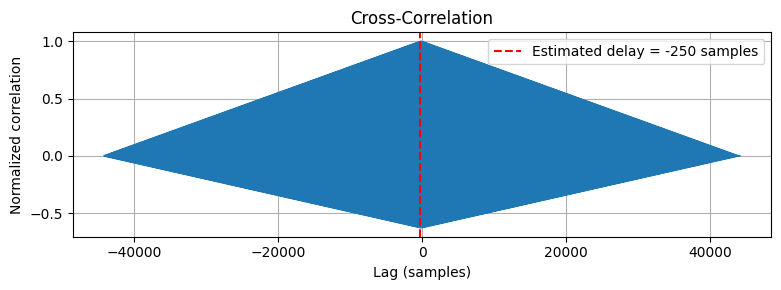

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(lags, cc)
plt.axvline(estimated_lag, color='r', linestyle='--', label=f"Estimated delay = {estimated_lag} samples")
plt.title("Cross-Correlation")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized correlation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5 Spectral Analysis

## Fourier Transformation
---
Maps a signal in the time domain to a representation int he frequency domain. 
It is just an instance of *basis representation* representing a signal as a *linear combination*.

$$
y(t)= \sum_k c_k \Psi_{k} (t)
$$

- Where $\Psi(t)$ are scaled by coefficients $c_k$.

## Basis Representation 
---
A basis is a set of building blocks you can use to reconstruct any signal / vector in your space.

## Linear Combination
---
$$
a_1 * v_1 + a_2 * v_2 + ... a_n*v_n
$$

## Discrete Fourier Transform 
---
Maps length N signals to a set of N frequency components.

## Equivalent Representation 1: sine and cosine amplitudes
---
$$
y(t) = \frac{a_0}{2} + \sum_{k=1}^{N} a_k * cos(kt) + b_n * sin(kt)
$$ 

## Equivalent Representation 2: amplitude and phase
---
$$
a*cos(\theta) + b*sin(\theta) = A*cos(\theta + \phi)
$$

- $A = sign(a) \cdot \sqrt{a^2 - b^2}$
- $\phi = arctan(-b/a)$

$$
y(t) = \frac{a_0}{2} + \sum_{k=1}^N A_n * cos(kt + \phi_k)
$$

## Equivalent Representation 3 : Complex Exponentials
using euler's formula

$$
exp(j*\theta) = cos(\theta) + j* sin(\theta)
$$

j is indicating an imaginary number , standard in engineering since i is index. $w_0$ is an arbitrary fundamental frequency (Hz)
$$
y(t) = \sum_{k=-N}^N c_n*exp(j*2*\pi*\omega_0*k*t)
$$

each term in the series is a harmonic of the fundamental frequency $\omega_0$


## Inverse transformations and efficiency
Inverse DFT reconstructs a time domain signal from the frequency domain components.

## Efficiency
The native DFT takes $O(N^2)$ time , fast fourier transformation algorithm brings it down to $O(N* log(N))$.

## 5a

In [42]:
fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

f1 = 220  # A3 note
alist = [1.0, 0.5, 0.3, 0.2]
philist = -np.pi/2

x = harmonic(t, f1=f1, alist=alist, philist=philist)


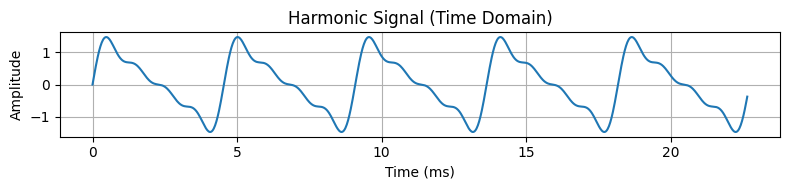

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.plot(t[:1000]*1000, x[:1000])
plt.title("Harmonic Signal (Time Domain)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


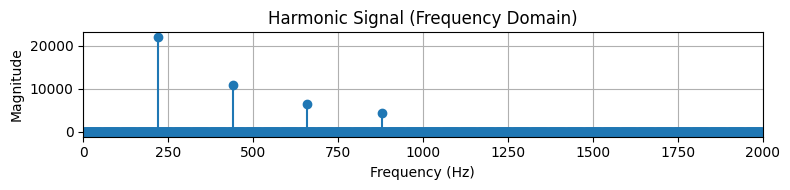

In [45]:
from scipy.fft import fft, fftfreq

N = len(x)
X = np.abs(fft(x))[:N//2]
freqs = fftfreq(N, 1/fs)[:N//2]

plt.figure(figsize=(8, 2))
plt.stem(freqs, X, basefmt=" ")
plt.title("Harmonic Signal (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 2000)
plt.grid(True)
plt.tight_layout()
plt.show()


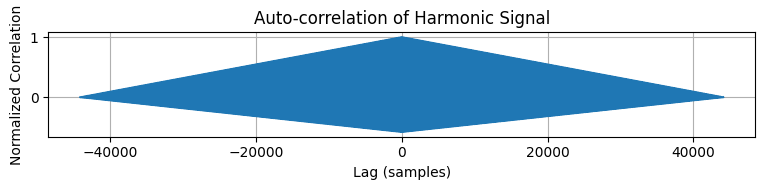

In [46]:
ac = autocorr(x)
lags = np.arange(-len(x)+1, len(x))

plt.figure(figsize=(8, 2))
plt.plot(lags, ac)
plt.title("Auto-correlation of Harmonic Signal")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5b

In [47]:
fs = 44100
duration = 1.0
n_samples = int(fs * duration)

# Gaussian white noise
noise = np.random.normal(0, 1, n_samples)


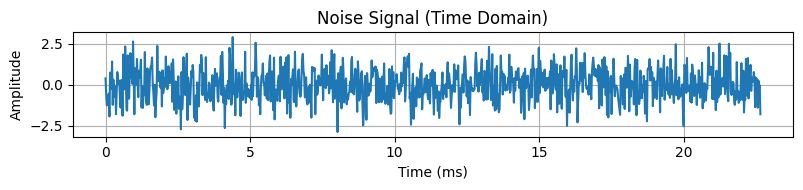

In [48]:
import matplotlib.pyplot as plt

t = np.linspace(0, duration, n_samples, endpoint=False)

plt.figure(figsize=(8, 2))
plt.plot(t[:1000]*1000, noise[:1000])  # show first ~1000 samples
plt.title("Noise Signal (Time Domain)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


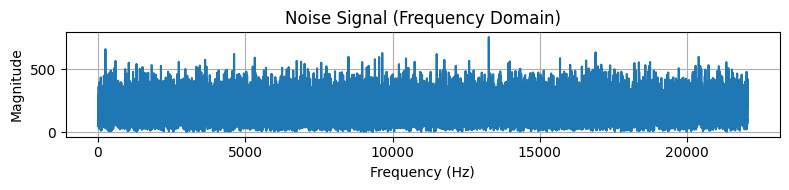

In [49]:
from scipy.fft import fft, fftfreq

N = len(noise)
X = np.abs(fft(noise))[:N//2]
freqs = fftfreq(N, 1/fs)[:N//2]

plt.figure(figsize=(8, 2))
plt.plot(freqs, X)
plt.title("Noise Signal (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


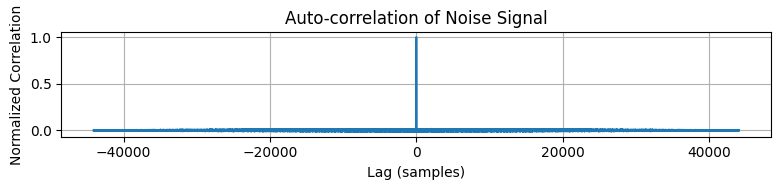

In [50]:
from scipy.signal import correlate

ac = autocorr(noise)
lags = np.arange(-len(noise) + 1, len(noise))

plt.figure(figsize=(8, 2))
plt.plot(lags, ac)
plt.title("Auto-correlation of Noise Signal")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()


The spectrum of a synthesized signal may not exactly match the amplitudes used to generate it due to factors like spectral leakage, limited time windows, and frequency resolution. If the signal’s frequencies do not align perfectly with the DFT bin centers, energy can spread across neighboring bins, distorting the expected peaks. Windowing effects from analyzing a finite-duration signal can also cause sinc-shaped spreading in the spectrum. To get an exact match, the signal must be composed of sinusoidal components at frequencies that fall exactly on DFT bins and complete an integer number of cycles within the analysis window. Under these conditions, spectral analysis can decompose the signal precisely, with clear peaks at the correct amplitudes.


# Grand Challenge

make a "real" sound

In [ ]:
from scipy.io.wavfile import write

notes = [440, 494, 523.25, 0, 440]  # A4, B4, C5, rest, A4 again
durations = [0.5, 0.5, 0.5, 0.25, 1.0]  # seconds

def simple_timbre(f0, t):
    return harmonic(t, f1=f0, alist=[1, 0.4, 0.2], philist=-np.pi/2)

def synthesize_melody(notes, durations, timbre_fn, fs=44100):
    waveform = np.array([])

    for f0, dur in zip(notes, durations):
        t = np.linspace(0, dur, int(fs * dur), endpoint=False)

        if f0 == 0:
            # Rest (silence)
            segment = np.zeros_like(t)
        else:
            # Generate note with timbre
            segment = timbre_fn(f0, t)

            # Normalize to avoid clipping
            segment = segment / np.max(np.abs(segment))

        waveform = np.concatenate([waveform, segment])

    return waveform

wave = synthesize_melody(notes, durations, simple_timbre)

write("melody.wav", 44100, (wave * 32767).astype(np.int16))


No, it doesn't sound dynamic, it sounds static. Real flute ntoes may be around this pitch, tone , and timbre and similarly structured waves. I am not sure I am missing exactly, but if I had to guess, real noises are distorted while they are made, not this uniform, giving it character. These notes sound like video game beaps.